# Time Dynamics Challenge

This challenge is about computing the time evolution of a quantum system. We will focus on the harmonic oscillator for this first exploration (you could try a self interacting particle after you finish this challenge). Our Hamiltonian is:

\begin{equation}
    H = -\frac{\partial^2}{\partial x^2} + \alpha x^2
\end{equation}

Let us drop the numerical constants to simplify notation ($\hbar=1$).

The evolution of a quantum mechanical wave function is [described through Schrodinger equation as](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)#Schr%C3%B6dinger_equation):

\begin{equation}
    H \left| \phi (t,x) \right\rangle = i  {\partial\over\partial t} \left| \phi (t,x) \right\rangle,
\end{equation}

which results in the evolution operator from an initial state:

\begin{equation}
    \left| \phi (t,x) \right\rangle = e^{-iHt} | \phi (0,x) \rangle.
\end{equation}

To solve the problem numerically, the evolution operator is usually expanded in its Taylor approximation and a finite time step $\Delta t$ is taken:

\begin{equation}
    \left| \phi (\Delta t,x) \right\rangle \approx \big(1 + (-iH\Delta t) + \frac{1}{2} (-iH\Delta t)^2 + ... \big) | \phi (0,x) \rangle.
\end{equation}

By taking small steps $\Delta t$, we can leave the expansion up to a small order (even linear in $\Delta t$) and arrive at the final time by succesively applying the approximated evolution operator.

Your tasks are:

- Create an initial state $\phi (0,x)$, an option would be an off-set Gaussian: $\propto e^{-(x-x_0)^2/2\sigma^2}$
- Build the time propagator to take the state from $t=0$ to some final time $t=t_f$.
- Make a movie with the evolution of your wave function (both real and imaginary parts) as well as the density
- Bonus challenge: replace the harmonic oscillator equation with the self interacting one from the challenge

Bellow is the initial code for the harmonic oscillator solver to help you start

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import time

import timeit



In [19]:
def generate_second_derivative_matrix(xgrid):
    N = len(xgrid)
    dx = xgrid[1]-xgrid[0]
    
    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 /2 / dx**2)
    off_diag = np.ones(N - 1)* 4/3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))
    
    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)
    

    
    return D2


In [20]:
def generate_potential_matrix(xgrid):
    return np.diag(xgrid**2)


In [29]:
def HO_solver(alpha,D2Mat,vpot):
    
    H = -D2Mat + alpha*vpot
    evals,evects = np.linalg.eigh(H)
    
    return [evals[0],evects.T[0]*np.sign(evects.T[0][len(evects.T[0]) // 2])]

In [30]:
#Example of a fixed grid

x_max = 10.0  # Maximum coordinate value for the grid

N_grid=300
# Set up the coordinate grid
x = np.linspace(-x_max, x_max, N_grid)

D20=generate_second_derivative_matrix(x)
V0=generate_potential_matrix(x)

In [31]:
alpha0=2

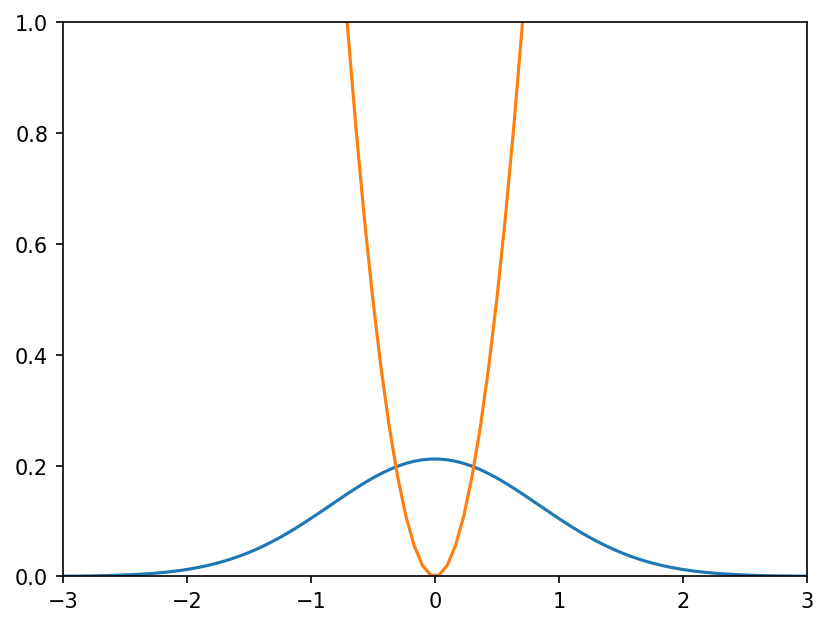

In [33]:
fig = plt.figure(dpi=150)

plt.plot(x,HO_solver(alpha0,D20,V0)[1])

plt.plot(x,alpha0*np.diag(V0))

plt.xlim(-3,3)

plt.ylim(0,1)

plt.show()

In [ ]:
# Smart code for solving the time dependent part goes here...

# Some help to build the animation movie
This is taken from: http://rbm.ascsn.net/HO_Time/HO_Time_Dependent.html , it might not work perfectly well out of the box but it could help you build your own

In [34]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation

In [ ]:
seconds_total=10
#Approximately how long we want our movie to last

In [ ]:
def Movie_Maker(wf_lists,rholists,Omega_Value,name):

    fig = plt.figure(dpi=200)
    ax = plt.axes(xlim=(-4, 4), ylim=(-2, 2))
    ax.plot(x,0.5 * Omega_Value**2 * x**2)
    plt.plot(x,initial_state/np.sqrt((np.dot(initial_state,np.conj(initial_state))*dx)),color='k',alpha=0.5)
    line, = ax.plot([], [], lw=3,color='b',alpha=0.5)
    line2, = ax.plot([], [], lw=3,linestyle='dashed',color='r',alpha=0.5)
    line3, = ax.plot([], [], lw=3,color='orange',alpha=0.5)

    def init():
        line.set_data([], [])
        return line,
    def animate(i):


        line.set_data(x,np.real(wf_lists[i]) )
        line2.set_data(x,np.imag(wf_lists[i]) )
        line3.set_data(x,rholists[i])
        return line,

#     anim = FuncAnimation(fig, animate, init_func=init,
#                                    frames=len(wf_lists), interval=frame_delay*1000, blit=True)

    
    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=len(wf_lists), blit=True)
    
    
    FFwriter = animation.FFMpegWriter(fps=frame_per_second)
    anim.save(name+'.mp4', writer=FFwriter)